In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exploratory Data Analysis (EDA) involves systematically analyzing and understanding the characteristics of a dataset to derive insights and inform subsequent analyses. This process typically includes examining summary statistics, data distributions, relationships between variables, and detecting anomalies. Through EDA, analysts gain a deeper understanding of the dataset's structure, uncover patterns, identify trends, and highlight potential issues such as outliers or missing values. Visualization techniques, such as histograms, scatter plots, and correlation matrices, play a crucial role in EDA, providing intuitive representations of data that aid in interpretation and decision-making.

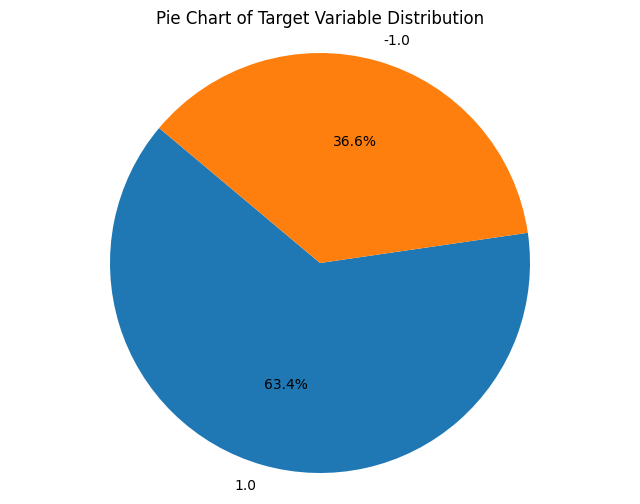

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

# Load each dataset
datasets = ['/content/drive/MyDrive/commercial_news_detection_16/BBC.txt',
            '/content/drive/MyDrive/commercial_news_detection_16/CNN.txt',
            '/content/drive/MyDrive/commercial_news_detection_16/CNNIBN.txt',
            '/content/drive/MyDrive/commercial_news_detection_16/NDTV.txt',
            '/content/drive/MyDrive/commercial_news_detection_16/TIMESNOW.txt']

# Initialize empty lists to store data
X_data = []
y_data = []

# Load each dataset and append to lists
for dataset_file in datasets:
    X, y = load_svmlight_file(dataset_file)
    X_dense = X.toarray()  # Convert sparse matrix to dense array
    X_data.append(X_dense)
    y_data.append(y)

# Convert to DataFrames
dfs = []
for i, (X, y) in enumerate(zip(X_data, y_data), 1):
    df = pd.DataFrame(X)
    df['target'] = y
    dfs.append(df)

# Combine all datasets into a single DataFrame
combined_df = pd.concat(dfs)

# Calculate category frequencies
target_counts = combined_df['target'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Target Variable Distribution')
plt.show()

Dataset 1 shape: (17720, 4126)

Preview of dataset:
       0         1         2          3         4         5         6  \
0  123.0  1.316440  1.516003   5.605905  5.346760  0.013233  0.010729   
1  124.0  0.966079  0.546420   4.046537  3.190973  0.008338  0.011490   
2  109.0  2.035407  0.571643   9.551406  5.803685  0.015189  0.014294   
3   86.0  3.206008  0.786326  10.092709  2.693058  0.013962  0.011039   
4   76.0  3.135861  0.896346  10.348035  2.651010  0.020914  0.012061   

          7         8            9  ...  4116  4117  4118  4119  4120  4121  \
0  0.091743  0.050768  3808.067871  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.075504  0.065841  3466.266113  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.094209  0.044991  3798.196533  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.092042  0.043756  3761.712402  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.108018  0.052617  3784.488037  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   4122      4123      4124  targe

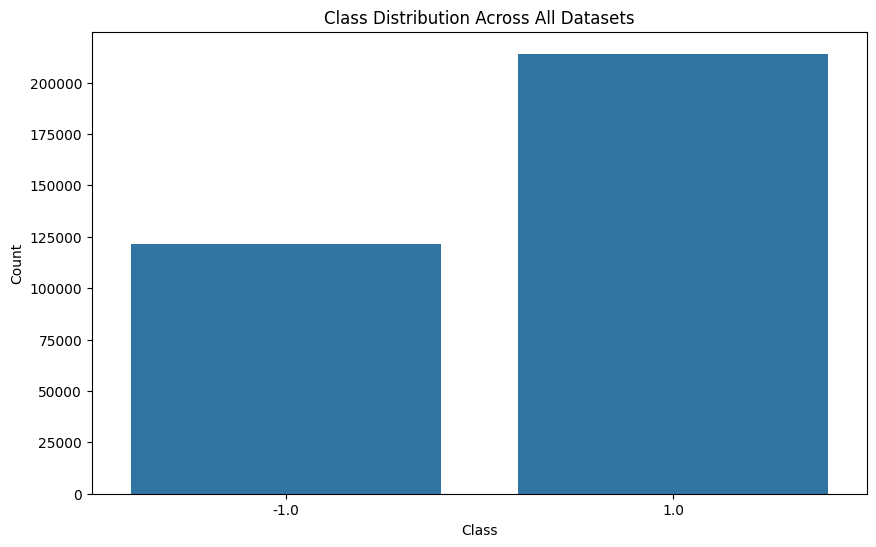

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

# Load each dataset
datasets = ['/content/drive/MyDrive/commercial_news_detection_16/BBC.txt',
            '/content/drive/MyDrive/commercial_news_detection_16/CNN.txt',
            '/content/drive/MyDrive/commercial_news_detection_16/CNNIBN.txt',
            '/content/drive/MyDrive/commercial_news_detection_16/NDTV.txt',
            '/content/drive/MyDrive/commercial_news_detection_16/TIMESNOW.txt']

# Initialize empty lists to store data
X_data = []
y_data = []

# Load each dataset and append to lists
for dataset_file in datasets:
    X, y = load_svmlight_file(dataset_file)
    X_dense = X.toarray()  # Convert sparse matrix to dense array
    X_data.append(X_dense)
    y_data.append(y)

# Convert to DataFrames
dfs = []
for i, (X, y) in enumerate(zip(X_data, y_data), 1):
    df = pd.DataFrame(X)
    df['target'] = y
    dfs.append(df)
    print(f"Dataset {i} shape:", df.shape)
    print("\nPreview of dataset:")
    print(df.head())
    print("\nSummary statistics:")
    print(df.describe())
    print("\nClass distribution:")
    print(df['target'].value_counts())
    print("-------------------------------------")

# Combine all datasets into a single DataFrame
combined_df = pd.concat(dfs)

# Visualize class distribution across all datasets
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=combined_df)
plt.title('Class Distribution Across All Datasets')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Model Training and Preprocessing

In [ ]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from file
X1, y1 = load_svmlight_file('/content/drive/MyDrive/commercial_news_detection_16/BBC.txt')
X2, y2 = load_svmlight_file('/content/drive/MyDrive/commercial_news_detection_16/CNN.txt')
X3, y3 = load_svmlight_file('/content/drive/MyDrive/commercial_news_detection_16/CNNIBN.txt')
X4, y4 = load_svmlight_file('/content/drive/MyDrive/commercial_news_detection_16/NDTV.txt')
X5, y5 = load_svmlight_file('/content/drive/MyDrive/commercial_news_detection_16/TIMESNOW.txt')

# Standardize the features for each dataset
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1.toarray())  # Convert to dense array for scaling
X2_scaled = scaler.fit_transform(X2.toarray())
X3_scaled = scaler.fit_transform(X3.toarray())
X4_scaled = scaler.fit_transform(X4.toarray())
X5_scaled = scaler.fit_transform(X5.toarray())

# Split the data into training and testing sets for each dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.2, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4_scaled, y4, test_size=0.2, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5_scaled, y5, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Define a simple neural network model
def create_nn_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define a Gaussian Processes classifier
kernel = 1.0 * RBF(1.0)
gp_classifier = GaussianProcessClassifier(kernel=kernel)

# Add Neural Network and Gaussian Processes to classifiers
classifiers['Neural Network'] = create_nn_model(input_shape=X1_train.shape[1:])
classifiers['Gaussian Processes'] = gp_classifier

# Train and evaluate each classifier for each dataset
for clf_name, clf in classifiers.items():
    print(f"Evaluating {clf_name}...")

    # Evaluate on BBC dataset
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)
    acc1 = accuracy_score(y1_test, y1_pred)
    print(f"Accuracy on BBC dataset: {acc1:.4f}")
    print("Classification Report on BBC dataset:")
    print(classification_report(y1_test, y1_pred))

    # Evaluate on CNN dataset
    clf.fit(X2_train, y2_train)
    y2_pred = clf.predict(X2_test)
    acc2 = accuracy_score(y2_test, y2_pred)
    print(f"Accuracy on CNN dataset: {acc2:.4f}")
    print("Classification Report on CNN dataset:")
    print(classification_report(y2_test, y2_pred))

    # Evaluate on CNNIBN dataset
    clf.fit(X3_train, y3_train)
    y3_pred = clf.predict(X3_test)
    acc3 = accuracy_score(y3_test, y3_pred)
    print(f"Accuracy on CNNIBN dataset: {acc3:.4f}")
    print("Classification Report on CNNIBN dataset:")
    print(classification_report(y3_test, y3_pred))

    # Evaluate on TimesNow dataset
    clf.fit(X4_train, y4_train)
    y4_pred = clf.predict(X4_test)
    acc4 = accuracy_score(y4_test, y4_pred)
    print(f"Accuracy on NDTV dataset: {acc4:.4f}")
    print("Classification Report on NDTV dataset:")
    print(classification_report(y4_test, y4_pred))

    # Evaluate on TIMESNOW dataset
    clf.fit(X5_train, y5_train)
    y5_pred = clf.predict(X5_test)
    acc5 = accuracy_score(y5_test, y5_pred)
    print(f"Accuracy on TIMESNOW dataset: {acc5:.4f}")
    print("Classification Report on TIMESNOW dataset:")
    print(classification_report(y5_test, y5_pred))

    print("---------------------------")


Evaluating Logistic Regression...
Accuracy on BBC dataset: 0.8592
Classification Report on BBC dataset:
              precision    recall  f1-score   support

        -1.0       0.83      0.92      0.87      1876
         1.0       0.90      0.79      0.84      1668

    accuracy                           0.86      3544
   macro avg       0.87      0.86      0.86      3544
weighted avg       0.86      0.86      0.86      3544

Accuracy on CNN dataset: 0.9171
Classification Report on CNN dataset:
              precision    recall  f1-score   support

        -1.0       0.90      0.87      0.89      1658
         1.0       0.93      0.94      0.93      2851

    accuracy                           0.92      4509
   macro avg       0.91      0.91      0.91      4509
weighted avg       0.92      0.92      0.92      4509

Accuracy on CNNIBN dataset: 0.9220
Classification Report on CNNIBN dataset:
              precision    recall  f1-score   support

        -1.0       0.90      0.87      0.

ValueError: Classification metrics can't handle a mix of binary and continuous targets